### Name - Ajinkya Suresh Kamble,                                   Roll no - 224102303

###  Importing Iibraries

In [11]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy.linalg as LA

### Preparing the dataset

In [12]:
###  EXTRACT DATASET     8 image per class as training data and 2 image per class as test data

image_name_for_training=[]
labels_name_for_training=[]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 
image_name_for_testing=[]
labels_name_for_testing=[]
training_image_per_class=8
train_horses = "ORL_new" 

for name in os.listdir(train_horses):
    i=0
    data_path = os.path.join(train_horses,name) # like s1 
    for name_img in os.listdir(data_path):
        dir_path = os.path.join(data_path,name_img)
        if(training_image_per_class > i):
            image_name_for_training += [dir_path]
            labels_name_for_training += [name]
            i+=1
        else:
            
            image_name_for_testing += [dir_path]
            labels_name_for_testing += [name]
            
print(labels_name_for_testing)

['s1', 's1', 's10', 's10', 's11', 's11', 's12', 's12', 's13', 's13', 's14', 's14', 's15', 's15', 's16', 's16', 's17', 's17', 's18', 's18', 's19', 's19', 's2', 's2', 's20', 's20', 's21', 's21', 's22', 's22', 's23', 's23', 's24', 's24', 's25', 's25', 's26', 's26', 's27', 's27', 's28', 's28', 's29', 's29', 's3', 's3', 's30', 's30', 's31', 's31', 's32', 's32', 's33', 's33', 's34', 's34', 's35', 's35', 's36', 's36', 's37', 's37', 's38', 's38', 's39', 's39', 's4', 's4', 's40', 's40', 's5', 's5', 's6', 's6', 's7', 's7', 's8', 's8', 's9', 's9']


(112, 92, 3)


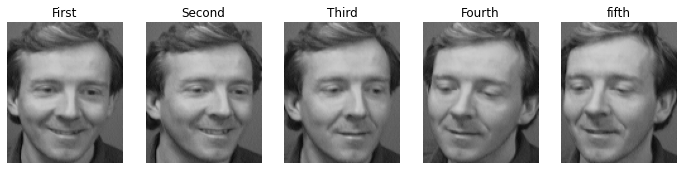

In [13]:
fig = plt.figure(figsize=(12, 8))

# setting values to rows and column variables
rows = 1
columns = 5

# reading images
Image1 = cv2.imread('1.pgm')
Image2 = cv2.imread('2.pgm')
Image3 = cv2.imread('3.pgm')
Image4 = cv2.imread('4.pgm')
Image5 = cv2.imread('5.pgm')

# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)

# showing image
plt.imshow(Image1)
plt.axis('off')
plt.title("First")

# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)

# showing image
plt.imshow(Image2)
plt.axis('off')
plt.title("Second")

# Adds a subplot at the 3rd position
fig.add_subplot(rows, columns, 3)

# showing image
plt.imshow(Image3)
plt.axis('off')
plt.title("Third")

# Adds a subplot at the 4th position
fig.add_subplot(rows, columns, 4)

# showing image
plt.imshow(Image4)
plt.axis('off')
plt.title("Fourth")

fig.add_subplot(rows, columns, 5)

# showing image
plt.imshow(Image5)
plt.axis('off')
plt.title("fifth")

print(Image1.shape)

In [21]:
### start making 2D PCA  #### it directly gives eivenvector, and pca training, test data, mean

def eigenvector_2DPCA(list_img):
    mean_gray = np.zeros((112,92))
    
    for name_img in list_img :
        gray = cv2.imread(name_img,0)
        mean_gray += gray
    mean_gray = mean_gray/len(list_img)
    
    image_matrix_for_training = np.zeros((len(list_img),112,92)) #image matrix n^2 x t
    scatter_matrix = np.zeros((92,92)) #why 92x92 
    
    i=0
    for name_img in list_img:
        img_matrix = cv2.imread(name_img,0)
        img_matrix = img_matrix - mean_gray
        scatter_matrix += np.matmul(img_matrix.T,img_matrix) #92x92 kyu pata chal gaya and to find eigenvalues and eigenvectors
        image_matrix_for_training[i,:,:] = img_matrix
        i += 1
    #print(len(image_matrix_for_training))
    
    eigen_val,eigen_vector = LA.eig(scatter_matrix)  #eigen value , vectors from scatter matrix
    
    sort_eigenval = np.sort(eigen_val)
    #print((sort_eigenval))
    
  
    
    #plotting eigenvalue magnitudes
    plt_1 = plt.figure(figsize=(12, 6))
    plt.stem(sort_eigenval[92:0:-1])
    plt.xlabel("sorted eigen values")
    plt.ylabel("eigen value magnitudes")
    
    #To check the no of eigenvectors required for 80% of energy after compression
    sum_all = np.sum(sort_eigenval)
    sum_95 = 0.80 * sum_all
    temp = 0
    p = 91  #last index
    while temp < sum_95:
        temp += sort_eigenval[p]
        p -= 1
    print("No of eigenvectors after Reduction " + str(92 - p) )
    x = np.sum(sort_eigenval[p:])/np.sum(sort_eigenval)  # this give the 95% energy
    print("Total Energy =" + str(x) )
    final_eigenvector = np.zeros((92,92-p))
    
    
    i = 0
    for f in range(p,92):
        final_eigenvalndex = np.where(eigen_val==sort_eigenval[f])[0]
        final_eigenvector[:,i] = np.asmatrix(eigen_vector[:,final_eigenvalndex]).T  
        i += 1
        
    pca_image_matrix_for_training = np.matmul(image_matrix_for_training,final_eigenvector)  #aki
        
    
    return pca_image_matrix_for_training,final_eigenvector,mean_gray,x     

No of eigenvectors after Reduction 9
Total Energy =0.8385502287778396


(320, 112, 9)

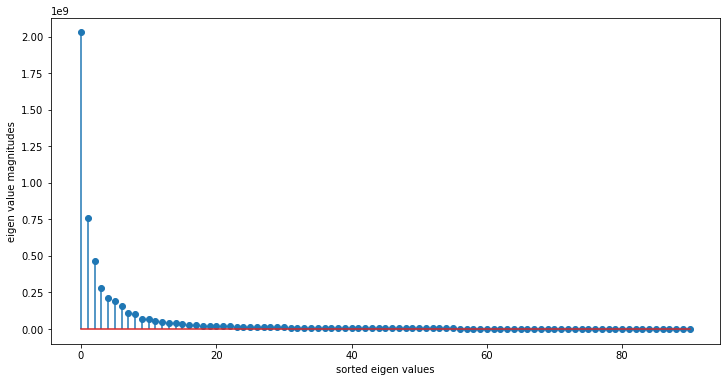

In [15]:
 ###### finding eiven value  and dimension reduce training data and mean
pca_image_matrix_for_training , eigenvector , mean_training_data , x = eigenvector_2DPCA(image_name_for_training)

pca_image_matrix_for_training.shape
#gives pca eigenvectors 9 , mean image , pca_image_matrix_for_training mai 112x 92 * 92x9 ho raha hai


In [16]:
eigenvector.shape

(92, 9)

In [17]:
 ###### findind pca based test data ###########
image_matrix_for_testing = np.zeros((len(image_name_for_testing),112,92))

i=0
for name_img in image_name_for_testing :
    
    img_matrix = cv2.imread(name_img,0)
    
    img_matrix = img_matrix - mean_training_data
    
    image_matrix_for_testing[i,:,:] = img_matrix
    i+=1
    
pca_image_matrix_for_testing = np.matmul(image_matrix_for_testing,eigenvector) 
print(image_name_for_testing[40])

ORL_new\s28\8.pgm


In [18]:
#### face recognition #### input is single image it will give recognize face and corresponding labels
def facerecognition(img):
    img_matrix = cv2.imread(img,0)
    img_matrix = img_matrix - mean_training_data    #mean_training_data -> mean_gray
    
    pca_image_matrix_for_testing = np.matmul(img_matrix,eigenvector) #112x9
    
    matching_matrix = np.square(pca_image_matrix_for_training - pca_image_matrix_for_testing) #ye test wali sare train mai se 
    print((matching_matrix.shape))
    
    sum_matrix = np.sum(matching_matrix,axis=1)
    print(sum_matrix.shape)
    
    abs_matrix = (np.sum(sum_matrix,axis=1)) #1 rowwise
    print(abs_matrix.shape)

    outmax_index = np.array(np.where(abs_matrix == np.min(abs_matrix)))
    print(outmax_index[0][0])
    
    img_matrix = cv2.imread(image_name_for_training[outmax_index[0,0]])
    print(img_matrix.shape)

    
    #print(abs_matrix)
    t = labels_name_for_training[outmax_index[0][0]]
    
    winname = "Predicted label = " +str(t)
    fig = plt.figure()
    ax = fig.add_subplot(1, 2, 1)
    plt.imshow(img_matrix)
    ax.set_title(winname)
    
    
    return labels_name_for_training[outmax_index[0,0]]
    


(320, 112, 9)
(320, 9)
(320,)
91
(112, 92, 3)
(320, 112, 9)
(320, 9)
(320,)
233
(112, 92, 3)


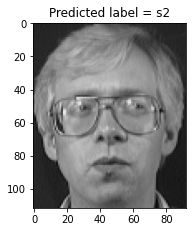

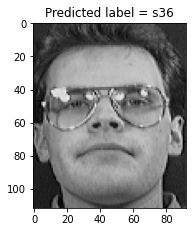

In [49]:
a1 = facerecognition('ORL_new//s2//8.pgm')
#a0 = facerecognition('ORL_new//s4//10.pgm')
a3 = facerecognition('ORL_new//s19//9.pgm')

### calculating Accuracy

In [20]:
#### testing the data for accuracy #############
a=0
for i in range(0,80):
    matching_matrix = np.square(pca_image_matrix_for_training - pca_image_matrix_for_testing[i,:,:])
    sum_matrix = np.sum(matching_matrix,axis=1)
    abs_matrix = np.abs(np.sum(sum_matrix,axis=1))
    outmax_index = np.array(np.where(abs_matrix==np.min(abs_matrix)))
    if (labels_name_for_testing[i] == labels_name_for_training[outmax_index[0,0]]):
        a += 1
    else:
        print(i)
        b = i    
a


21
40


78

In [28]:
Accuracy_percentage = a/80

In [29]:
Accuracy_percentage

0.975